# Collatz problem

## 関数定義

In [10]:
def collatz(num):
    if (type(num) != int) or (num <= 0):
        print('Input a positive integer')
    elif num == 1:
        return 0
    elif num % 2 == 0:
        return int(num/2)
    else:
        return num*3+1

In [ ]:
num = 7
mylist = [num]

while num > 1 and len(mylist) < 1000:
    num = collatz(num)
    mylist.append(num)
else: print(mylist)

In [11]:
def collatz_list(num):
    mylist = [num]
    while num > 1:
        num = collatz(num)
        mylist.append(num)
    else: return mylist

In [28]:
mylist = collatz_list(1)
max(mylist),len(mylist)

(1, 1)

In [70]:
from tqdm import tqdm_notebook as tqdm

N = 10**5

X = range(1, N+1)
Y = [len(collatz_list(num))-1 for num in tqdm(X)]

HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

In [14]:
dic ={0:0, 1:0}

def collatz_length(n):
    if not(n in dic.keys()):
        m = collatz(n)
        dic[n] = collatz_length(m) + 1
    return dic[n]

In [76]:
N = 10**6
X = range(2,N+1)

dic = {0:0, 1:0}
for n in tqdm(X):
     collatz_length(n)
Y = [c[1] for c in sorted(list(dic.items()))][2:N+1]; 

HBox(children=(IntProgress(value=0, max=999999), HTML(value='')))

## グラフ

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

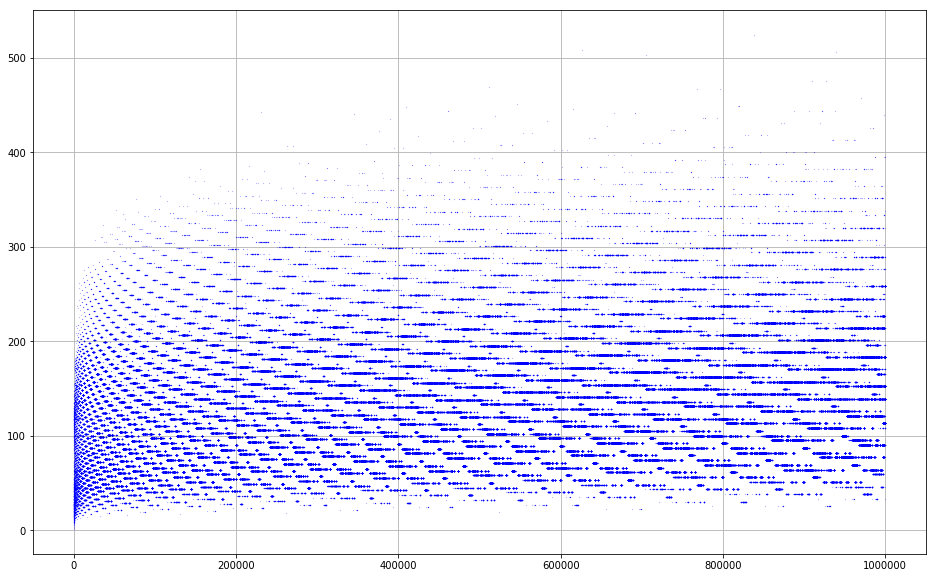

In [79]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.plot(X,Y, 'b.', ms=0.2 )
plt.show()

In [ ]:
for k in range(100):
    if k%2==0 and k%3==1:
        print(collatz_list(k))

In [ ]:
class node:
    def __init__(self, val, children):
        self.val = val
        self.children = children  # List of Class node

    def display(self, chain='', indent='', shrink=True):
        # set chain and indent
        if self.val%2==0:
            chain += str(self.val) + '-'
        else:
            indent += ' '*(len(chain)-2)
            print(indent + '|')
            chain = str(self.val) + '-'
        # display chain or pass to children
        if shrink and self.val%3 == 0:
            print(indent + chain +'...')
        elif self.children == None:
            print(indent + chain)
        else:
            for c in self.children:
                c.display(chain, indent, shrink)
                
    def display_simp(self, power=0, chain='', indent='', shrink=True):
        # set chain and indent
        if self.val%2==0:
            chain += str(power) + '-'
        else:
            indent += ' '*(len(chain)-2)
            print(indent + '|')
            power = 0
            chain = '({})'.format(self.val) + '-'
        # display chain or pass to children
        if shrink and self.val%3 == 0:
            print(indent + chain.replace('-','...'))
        elif self.children == None:
            print(indent + chain)
        else:
            for c in self.children:
                power += 1
                c.display_simp(power, chain, indent, shrink)

        
def maketree(num, maxdepth):
    if (maxdepth > 0):
        children = [ maketree(2*num, maxdepth-1) ]
        if not(num in [1,4]) and (num%3 == 1 and num%6 != 1):
            children.append( maketree(int((num-1)/3), maxdepth-1))
    else:
        children = None

    rootnode = node(num, children)
    return rootnode

In [ ]:
t=maketree(1, 20)
# t.display()
t.display_simp()

In [ ]:
s = maketree(853,16)
s.display_simp()